In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
tf.random.set_seed(1)

In [4]:
dataset=pd.read_csv('./train_mode3_TC.csv')

#데이터를 8:2로 분할   
train_mode3_train=dataset.sample(frac=0.8,random_state=2 )
train_mode3_test = dataset.drop(train_mode3_train.index)

    

print("train")
print(train_mode3_train.shape)

print("test")
print(train_mode3_test.shape)

train
(223313, 6)
test
(55828, 6)


In [5]:
train_mode3_train.pop('Unnamed: 0')
train_mode3_test.pop('Unnamed: 0')

8          6340
19         1761
24        16775
34         4235
35        13751
          ...  
279116    11851
279120    79731
279130      542
279131     2651
279135     2842
Name: Unnamed: 0, Length: 55828, dtype: int64

In [6]:
train_labels = train_mode3_train.pop('state')
test_labels = train_mode3_test.pop('state')

# n default: 64

In [7]:
print(train_mode3_train)

        Air temp, TC inlet (TE29)  Exh. Gas temp, TC Inlet  \
175772                  -0.164788                 0.417945   
222236                  -0.413312                -0.092667   
131030                  -0.655931                 0.422148   
9401                     0.322061                -0.816978   
66962                   -1.534622                 0.271486   
...                           ...                      ...   
140438                  -0.164788                 0.316243   
122991                   0.727322                 0.755411   
198162                   0.531938                 0.356167   
236248                   0.172840                -1.373608   
278462                  -0.444444                -0.889262   

        Exh. Gas temp, TC Outlet  TC speed  
175772                 -0.600406  0.375127  
222236                 -0.046533 -0.288421  
131030                 -0.596814  0.385966  
9401                   -0.669113 -0.292867  
66962                   0.3577

In [8]:
def build_model_mode3_TC():
  model = keras.Sequential([
    keras.layers.Dense(9, activation='relu', input_shape=[len(train_mode3_train.keys())]),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),  
    keras.layers.Dense(1)
  ])

              
  optimizer = tf.keras.optimizers.RMSprop(0.00125)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [9]:
model1_mode3_TC=build_model_mode3_TC()
model2_mode3_TC=build_model_mode3_TC()
model3_mode3_TC=build_model_mode3_TC()



model1_mode3_TC.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 45        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [10]:
EPOCHS=100
#
print(EPOCHS)
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print(epoch/10, end=' ')
    
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

print(1)

history1 = model1_mode3_TC.fit(train_mode3_train, train_labels, epochs=EPOCHS,
                    validation_split = 0.25, verbose=0, callbacks=[early_stop, PrintDot()])
print("\n")
print(2)
history2 = model2_mode3_TC.fit(train_mode3_train, train_labels, epochs=EPOCHS,
                    validation_split = 0.25, verbose=0, callbacks=[early_stop, PrintDot()])
print("\n")
print(3)
history3 = model3_mode3_TC.fit(train_mode3_train, train_labels, epochs=EPOCHS,
                    validation_split = 0.25, verbose=0, callbacks=[early_stop, PrintDot()])



#model 확인

100
1

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.0 4.1 4.2 4.3 4.4 

2

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.0 4.1 4.2 

3

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 

In [11]:
#데이터프레임으로 결과저장
hist1 = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch
hist2 = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch
hist3 = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch





hist1.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
40,0.013534,0.031976,0.013534,0.014301,0.042725,0.014301,40
41,0.013656,0.032436,0.013656,0.012803,0.026267,0.012803,41
42,0.013717,0.032433,0.013717,0.013290,0.031110,0.013290,42
43,0.013803,0.033126,0.013803,0.013354,0.027349,0.013354,43
44,0.013877,0.033409,0.013877,0.013644,0.038186,0.013644,44


In [12]:
#학습된 모델로 예측
test_predictions1 = model1_mode3_TC.predict(train_mode3_test).flatten()
test_predictions2 = model2_mode3_TC.predict(train_mode3_test).flatten()
test_predictions3 = model3_mode3_TC.predict(train_mode3_test).flatten()


test_predictions_mean=pd.DataFrame()

test_predictions_mean=(test_predictions1+test_predictions2+test_predictions3)/3

print(test_predictions1)
print(test_predictions_mean)
#af=plt.scatter(test_labels, test_predictions_mean)

#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([-1,plt.ylim()[2]])
#_ = plt.plot([-100, 100], [-100, 100])

[0.97598433 0.0737306  0.99430096 ... 0.02670333 0.0143847  0.9815768 ]
[ 0.92717814  0.02762957  0.99431497 ...  0.00448288 -0.00706423
  0.98820907]


Text(0.5, 0, 'System Predictions')

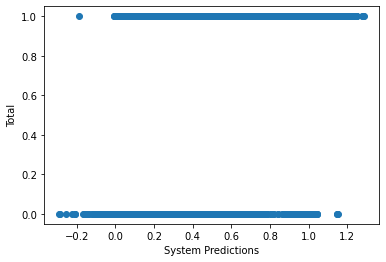

In [13]:
plt.scatter(test_predictions1,test_labels)
plt.ylabel('Total')
plt.xlabel('System Predictions')


Text(0.5, 0, 'System Predictions')

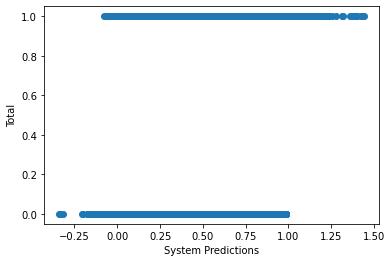

In [14]:
plt.scatter(test_predictions2,test_labels)
plt.ylabel('Total')
plt.xlabel('System Predictions')


Text(0.5, 0, 'System Predictions')

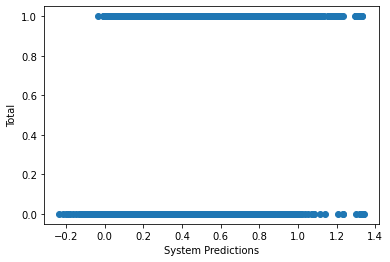

In [15]:
plt.scatter(test_predictions3,test_labels)
plt.ylabel('Total')
plt.xlabel('System Predictions')


Text(0.5, 0, 'System Predictions')

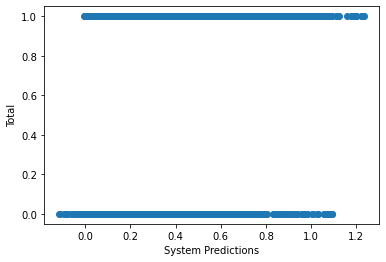

In [16]:
plt.scatter(test_predictions_mean,test_labels)
plt.ylabel('Total')
plt.xlabel('System Predictions')


(array([6.0000e+00, 9.0000e+00, 4.4000e+01, 2.0737e+04, 5.8390e+03,
        4.1500e+02, 1.9000e+02, 1.8200e+02, 1.1400e+02, 1.5200e+02,
        1.4100e+02, 1.7700e+02, 1.2100e+02, 1.4700e+02, 1.4300e+02,
        4.6250e+03, 2.2471e+04, 1.6100e+02, 1.4100e+02, 1.3000e+01]),
 array([-0.2902438 , -0.2114819 , -0.13272   , -0.05395808,  0.02480383,
         0.10356574,  0.18232764,  0.26108956,  0.33985147,  0.41861337,
         0.49737528,  0.5761372 ,  0.6548991 ,  0.733661  ,  0.81242293,
         0.8911848 ,  0.96994674,  1.0487087 ,  1.1274705 ,  1.2062324 ,
         1.2849944 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1df0479c7c8>])

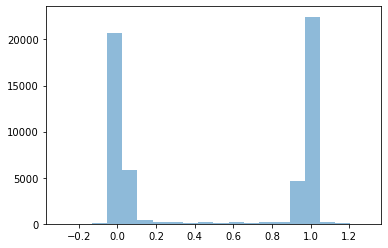

In [17]:
plt.hist(test_predictions1,bins=20, density=False, alpha=0.5,histtype='stepfilled')

(array([3.0000e+00, 9.0000e+00, 1.1700e+03, 2.4350e+04, 1.3990e+03,
        3.5700e+02, 2.4600e+02, 2.6700e+02, 2.1000e+02, 1.1400e+02,
        6.2000e+01, 8.5000e+01, 1.2400e+02, 3.2800e+02, 2.5424e+04,
        1.5540e+03, 8.7000e+01, 2.6000e+01, 3.0000e+00, 1.0000e+01]),
 array([-0.3380959 , -0.249191  , -0.1602861 , -0.0713812 ,  0.01752369,
         0.10642859,  0.1953335 ,  0.2842384 ,  0.3731433 ,  0.4620482 ,
         0.5509531 ,  0.639858  ,  0.72876287,  0.8176678 ,  0.9065727 ,
         0.99547756,  1.0843825 ,  1.1732874 ,  1.2621922 ,  1.3510972 ,
         1.4400021 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1df0453b888>])

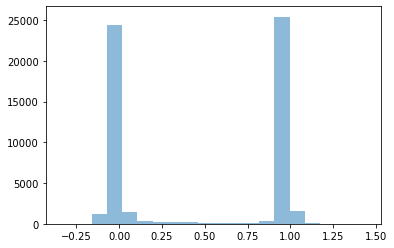

In [18]:
plt.hist(test_predictions2,bins=20, density=False, alpha=0.5,histtype='stepfilled')

(array([6.0000e+00, 1.5000e+01, 5.4240e+03, 2.0709e+04, 6.8300e+02,
        2.7600e+02, 1.8500e+02, 1.9900e+02, 2.4600e+02, 9.8000e+01,
        1.2100e+02, 1.0200e+02, 1.2800e+02, 2.1900e+02, 7.4900e+02,
        2.5729e+04, 8.2900e+02, 6.2000e+01, 1.6000e+01, 3.2000e+01]),
 array([-2.3514399e-01, -1.5638457e-01, -7.7625163e-02,  1.1342481e-03,
         7.9893664e-02,  1.5865308e-01,  2.3741248e-01,  3.1617188e-01,
         3.9493132e-01,  4.7369072e-01,  5.5245012e-01,  6.3120955e-01,
         7.0996898e-01,  7.8872836e-01,  8.6748779e-01,  9.4624722e-01,
         1.0250067e+00,  1.1037660e+00,  1.1825254e+00,  1.2612848e+00,
         1.3400443e+00], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1df047b8488>])

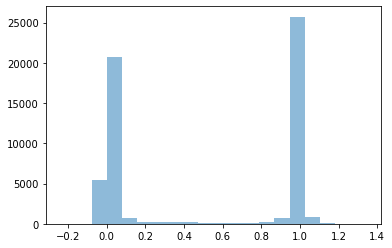

In [19]:
plt.hist(test_predictions3,bins=20, density=False, alpha=0.5,histtype='stepfilled')

(array([2.0000e+01, 2.3332e+04, 3.1160e+03, 4.3700e+02, 2.6000e+02,
        1.8500e+02, 1.8300e+02, 1.5500e+02, 1.4100e+02, 1.5900e+02,
        9.5000e+01, 9.5000e+01, 1.2900e+02, 7.1000e+01, 1.7700e+02,
        1.6150e+03, 2.5428e+04, 2.1700e+02, 4.0000e+00, 9.0000e+00]),
 array([-0.11447239, -0.04706993,  0.02033253,  0.08773498,  0.15513745,
         0.2225399 ,  0.28994235,  0.3573448 ,  0.4247473 ,  0.49214974,
         0.5595522 ,  0.6269547 ,  0.6943571 ,  0.7617596 ,  0.829162  ,
         0.8965645 ,  0.96396697,  1.0313694 ,  1.0987718 ,  1.1661743 ,
         1.2335768 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1df04824d08>])

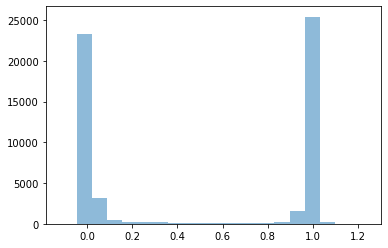

In [20]:
plt.hist(test_predictions_mean,bins=20, density=False, alpha=0.5,histtype='stepfilled')